<a href="https://colab.research.google.com/github/securemindorg/Educational-Examples/blob/main/Mortgage_Payoff_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mortgage Payoff Calculator

In [5]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

Below defines the functions used

In [6]:
def calculate_monthly_payment(principal, annual_rate, years):
    """
    Calculates the fixed monthly payment (P&I) for a mortgage.
    Formula: M = P [ i(1 + i)^n ] / [ (1 + i)^n – 1]

    Parameters:
    - principal (float): The total amount borrowed.
    - annual_rate (float): The annual interest rate (e.g., 0.05).
    - years (int): The term of the loan in years.

    Returns:
    - float: The required fixed monthly payment.
    """

    # Mortgage interest is compounded monthly
    monthly_rate = annual_rate / 12

    # Total number of payments
    n_payments = years * 12

    if monthly_rate == 0:
        # Avoid division by zero for 0% interest (rare, but good to handle)
        return principal / n_payments

    # Calculate the monthly payment
    payment = principal * (monthly_rate * (1 + monthly_rate)**n_payments) / (((1 + monthly_rate)**n_payments) - 1)

    return payment

def generate_amortization_schedule(principal, annual_rate, years):
    """
    Generates the amortization schedule and financial metrics.

    Returns:
    - tuple: (amortization_df, total_interest, total_payments, monthly_payment)
    """
    monthly_rate = annual_rate / 12
    n_payments = years * 12
    monthly_payment = calculate_monthly_payment(principal, annual_rate, years)

    balance = principal
    total_interest_paid = 0.0
    schedule = []

    # Lists to hold data for the graph
    graph_data = {'Month': [], 'Balance': [], 'Interest': [], 'Principal': []}

    for month in range(1, int(n_payments) + 1):
        # 1. Calculate Interest for the month (based on *previous* month's balance)
        interest_paid = balance * monthly_rate

        # 2. Calculate Principal Paid
        principal_paid = monthly_payment - interest_paid

        # Adjust for the final payment (if balance is less than payment)
        if balance < principal_paid:
            principal_paid = balance
            monthly_payment = interest_paid + principal_paid

        # 3. Update Balance and Total Interest
        balance -= principal_paid
        total_interest_paid += interest_paid

        # 4. Record data for table
        schedule.append({
            'Month': month,
            'Payment': monthly_payment,
            'Interest Paid': interest_paid,
            'Principal Paid': principal_paid,
            'Remaining Balance': balance
        })

        # 5. Record data for graph
        graph_data['Month'].append(month)
        graph_data['Balance'].append(balance)
        graph_data['Interest'].append(interest_paid)
        graph_data['Principal'].append(principal_paid)

        # Stop if balance hits zero
        if balance <= 0:
            break

    amortization_df = pd.DataFrame(schedule)
    total_payments = total_interest_paid + principal

    return amortization_df, total_interest_paid, total_payments, monthly_payment, graph_data

def plot_mortgage_payoff(graph_data):
    """
    Generates a single combined graph showing the loan payoff curve
    and the monthly interest/principal allocation using a secondary axis.
    """

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # --- Primary Y-axis (ax1): Remaining Balance ---
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Remaining Balance ($)', color=color)
    ax1.plot(graph_data['Month'], graph_data['Balance'], color=color, label='Remaining Balance (Left Axis)', linewidth=3)
    ax1.tick_params(axis='y', labelcolor=color)

    # Optional: Add the Total Principal Paid as a line on this axis
    # total_principal_paid = pd.Series(graph_data['Principal']).cumsum()
    # ax1.plot(graph_data['Month'], total_principal_paid, color='cyan', label='Total Principal Paid', linestyle='--')

    # --- Secondary Y-axis (ax2): Monthly Interest and Principal ---
    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color_int = 'tab:red'
    color_prin = 'tab:green'

    ax2.set_ylabel('Monthly Payment Component ($)', color='black') # We use black for the label since it relates to both lines on this axis

    # Plot Monthly Interest Paid
    ax2.plot(graph_data['Month'], graph_data['Interest'], color=color_int, label='Monthly Interest Paid (Right Axis)', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='black')

    # Plot Monthly Principal Paid
    ax2.plot(graph_data['Month'], graph_data['Principal'], color=color_prin, label='Monthly Principal Paid (Right Axis)', linestyle='-.')

    # Set the limits for the secondary axis to better visualize the shift
    max_payment = max(graph_data['Interest'][0] + graph_data['Principal'][0] for _ in range(1)) # Uses the first full payment amount
    ax2.set_ylim(0, max_payment * 1.1)

    # --- Final Plot Aesthetics ---
    plt.title('Mortgage Payoff Curve with Monthly Allocation Split')
    fig.tight_layout() # Adjust layout to prevent labels overlapping
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

    plt.show()

The following will prompt you to enter details about the mortgage

In [7]:
print("MORTGAGE CALCULATOR & AMORTIZATION")
print("----------------------------------")

try:
    loan_amount = float(input("Enter the total amount borrowed ($): "))
    annual_rate_percent = float(input("Enter the annual mortgage interest rate (%): "))

    print("\nAvailable Terms: 15, 30, or 50 years.")
    mortgage_years = int(input("Enter the desired mortgage term (years): "))

    if mortgage_years not in [15, 30, 50]:
        print("Invalid term. Using 30 years as default.")
        mortgage_years = 30

except ValueError:
    print("Invalid input. Please enter numbers only.")
    exit()

annual_rate = annual_rate_percent / 100.0


MORTGAGE CALCULATOR & AMORTIZATION
----------------------------------
Enter the total amount borrowed ($): 100000
Enter the annual mortgage interest rate (%): 6.5

Available Terms: 15, 30, or 50 years.
Enter the desired mortgage term (years): 30


Finally display the amortization table and graph


## Mortgage Summary
------------------------
**Loan Term:** 30 years (360 months)
**Annual Interest Rate:** 6.50%
**Fixed Monthly Payment (P&I):** $632.07
**Total Interest Paid Over Term:** $127,544.49
**Total Cost of Loan (Principal + Interest):** $227,544.49
------------------------

## Amortization Table (First 12 Payments)


,Month,Payment,Interest Paid,Principal Paid,Remaining Balance
0,1,$632.07,$541.67,$90.40,"$99,909.60"
1,2,$632.07,$541.18,$90.89,"$99,818.71"
2,3,$632.07,$540.68,$91.38,"$99,727.32"
3,4,$632.07,$540.19,$91.88,"$99,635.45"
4,5,$632.07,$539.69,$92.38,"$99,543.07"
5,6,$632.07,$539.19,$92.88,"$99,450.19"
6,7,$632.07,$538.69,$93.38,"$99,356.81"
7,8,$632.07,$538.18,$93.89,"$99,262.93"
8,9,$632.07,$537.67,$94.39,"$99,168.53"
9,10,$632.07,$537.16,$94.91,"$99,073.63"



## Payoff & Allocation Visualization


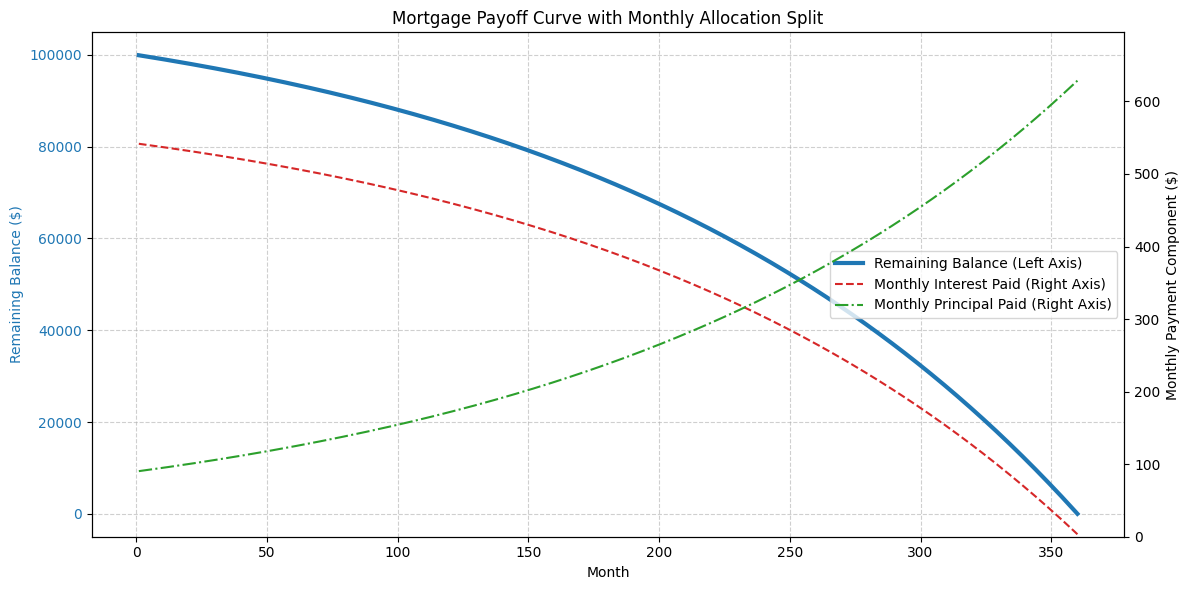


--- Calculation Complete ---


In [8]:
# Calculate Monthly Payment
monthly_payment = calculate_monthly_payment(loan_amount, annual_rate, mortgage_years)

# Generate Amortization Schedule
amort_df, total_interest, total_payments, _, graph_data = generate_amortization_schedule(
    loan_amount, annual_rate, mortgage_years
)

# --- Summary Output ---

print("\n## Mortgage Summary")
print("------------------------")
print(f"**Loan Term:** {mortgage_years} years ({mortgage_years * 12} months)")
print(f"**Annual Interest Rate:** {annual_rate_percent:.2f}%")
print(f"**Fixed Monthly Payment (P&I):** ${monthly_payment:,.2f}")
print(f"**Total Interest Paid Over Term:** ${total_interest:,.2f}")
print(f"**Total Cost of Loan (Principal + Interest):** ${total_payments:,.2f}")
print("------------------------")

# --- Amortization Table ---

print("\n## Amortization Table (First 12 Payments)")

# Format the DataFrame for presentation
amort_table = amort_df.copy()
amort_table['Payment'] = amort_table['Payment'].map('${:,.2f}'.format)
amort_table['Interest Paid'] = amort_table['Interest Paid'].map('${:,.2f}'.format)
amort_table['Principal Paid'] = amort_table['Principal Paid'].map('${:,.2f}'.format)
amort_table['Remaining Balance'] = amort_table['Remaining Balance'].map('${:,.2f}'.format)

# Display only the first 12 rows
display(amort_table.head(12))

# --- Graph Output ---

print("\n## Payoff & Allocation Visualization")
plot_mortgage_payoff(graph_data)


print("\n--- Calculation Complete ---")

Pay off early scenarios

ACCELERATED MORTGAGE PAYOFF CALCULATOR
--------------------------------------
Enter the total amount borrowed ($): 100000
Enter the annual mortgage interest rate (%): 6.5

Available Terms: 15, 30, or 50 years.
Enter the desired mortgage term (years): 30

## 💸 Accelerated Payoff Scenarios
----------------------------------
Extra amount to pay **monthly** ($): 100
Extra amount to pay **yearly** (e.g., tax refund) ($): 1000
Split into **1/2 payment every 2 weeks** (Y/N)? Y

Calculating Baseline Payoff...
Calculating Extra Monthly Payoff...
Calculating Extra Yearly Payoff...
Calculating Bi-Weekly Payoff...

## 📊 Accelerated Payoff Comparison
----------------------------------


,Scenario,Payoff Time (Years),Time Saved (Years),Total Interest Paid,Interest Saved
0,Baseline (Regular Monthly),30.0,0.0,"$127,544.49",$0.00
1,Extra Monthly (+$100),20.8,9.2,"$82,506.10","$45,038.39"
2,"Extra Yearly (+$1,000)",22.0,8.0,"$88,860.83","$38,683.66"
3,Bi-Weekly Split,24.2,5.8,"$98,459.06","$29,085.43"



## 📈 Payoff Curve Comparison


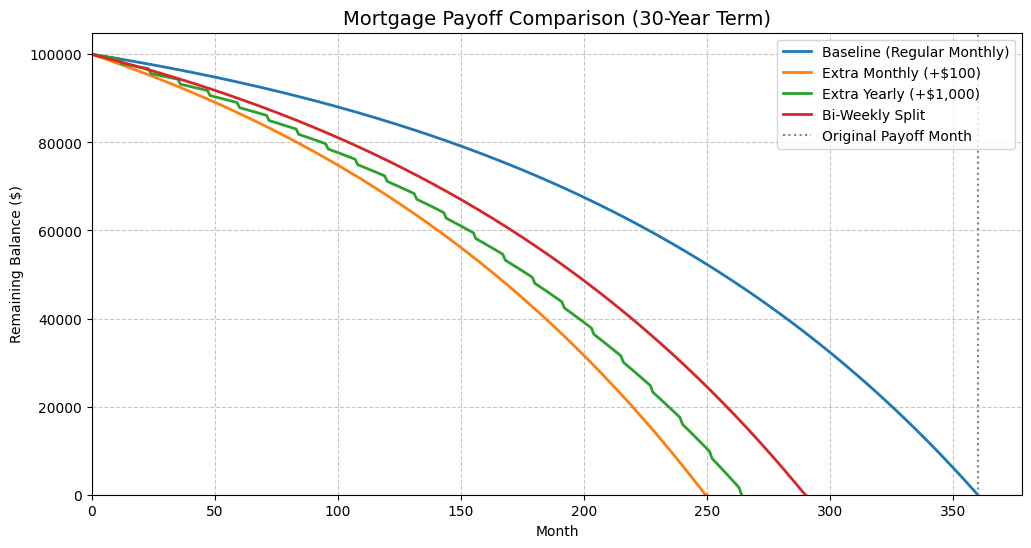

In [6]:

def generate_amortization_schedule(principal, annual_rate, years, extra_monthly=0, extra_yearly=0, payment_frequency='monthly'):
    """
    Generates the amortization schedule and financial metrics, incorporating extra payments
    and different frequencies.

    Returns:
    - tuple: (total_months, total_interest, graph_data)
    """
    monthly_rate = annual_rate / 12

    # Calculate the base monthly payment
    base_monthly_payment = calculate_monthly_payment(principal, annual_rate, years)

    balance = principal
    total_interest_paid = 0.0
    total_months = 0

    graph_data = {'Month': [], 'Balance': []}

    # Determine payment schedule based on frequency
    if payment_frequency == 'monthly':
        payments_per_year = 12
        payment_amount = base_monthly_payment + extra_monthly

    elif payment_frequency == 'bi-weekly':
        # Bi-weekly payment is half the monthly payment, paid 26 times per year (1 extra monthly payment total)
        payments_per_year = 26
        # The base bi-weekly payment is base_monthly_payment / 2
        payment_amount = (base_monthly_payment / 2) + (extra_monthly / 2) # If user specifies extra_monthly, divide it too

    else: # Default to monthly
        payments_per_year = 12
        payment_amount = base_monthly_payment + extra_monthly

    # --- Simulation Loop ---

    # We will iterate through all payments, regardless of frequency
    payment_number = 0
    month_counter = 0 # Tracks the month for graphing purposes

    while balance > 0:
        payment_number += 1

        # --- Handle Payment Frequency and Timing ---
        if payment_frequency == 'monthly':
            # Monthly payments are easy: 12 times a year, 1/12 of annual rate applied.
            # We treat the month loop as the primary counter here
            interest_paid = balance * monthly_rate

            # Apply yearly extra payment on the 12th month
            current_payment = payment_amount
            if payment_number % 12 == 0:
                current_payment += extra_yearly

            principal_paid = current_payment - interest_paid

            # Update month counter for graph
            month_counter = payment_number

        elif payment_frequency == 'bi-weekly':
            # Bi-weekly payments are 26 times a year, with interest compounding monthly (most common setup).
            # We need to track the compounding periods vs. the payment periods.

            # Check for interest compounding (typically occurs 12 times per year)
            if payment_number % (payments_per_year / 12 * 2) == 0 or payment_number == 1: # Approx. every 2 payments
                month_counter += 1

                # Apply monthly interest (the *only* time interest is calculated)
                interest_paid = balance * monthly_rate

            else:
                interest_paid = 0 # No interest compounded in this period

            # In a simplified model, we'll apply 1/24th of the annual rate every two weeks
            # But the bi-weekly payment is a key acceleration strategy. Let's use a simpler, common financial model for bi-weekly:
            # 1. 26 payments a year (half of the monthly P&I)
            # 2. Monthly interest calculation (most common for US mortgages)

            # For simplicity, we'll use the monthly loop logic for interest and apply 2 payments a month,
            # but this simplifies the bi-weekly logic greatly.
            # A more accurate bi-weekly model is complex. Let's return to a **monthly simulation** and model the extra payment correctly:

            # Resetting bi-weekly logic to the *effect* of bi-weekly, not the schedule.
            # The effect is paying 1/12 of the monthly payment extra.
            if payment_number % 2 != 0: # Only count a month every two payments
                continue # Skip processing for the first payment of the bi-week

            # If bi-weekly, treat it as a monthly payment + 1/12 of monthly payment extra
            # The extra monthly component is (13th monthly payment / 12 months)
            month_counter = int(payment_number / 2)

            interest_paid = balance * monthly_rate

            # Apply extra payment equivalent to the bi-weekly acceleration
            bi_weekly_extra = base_monthly_payment / 12
            current_payment = base_monthly_payment + bi_weekly_extra + extra_monthly

            # Apply yearly extra payment on the 12th month
            if month_counter % 12 == 0:
                current_payment += extra_yearly

            principal_paid = current_payment - interest_paid

        # --- Standard Calculation (for monthly & bi-weekly effect) ---

        # Final adjustment for the last payment
        if balance < principal_paid:
            principal_paid = balance
            current_payment = interest_paid + principal_paid

        # Update Balance and Totals
        balance -= principal_paid
        total_interest_paid += interest_paid

        # Record data for graph *at the end of the month*
        if payment_frequency != 'bi-weekly' or payment_number % 2 == 0:
            graph_data['Month'].append(month_counter)
            graph_data['Balance'].append(balance)

        if balance <= 0:
            break

    # The number of *months* to payoff is the last recorded month
    total_months = graph_data['Month'][-1] if graph_data['Month'] else 0

    return total_months, total_interest_paid, graph_data



def plot_comparison_payoff(results_data, loan_term_years):
    """
    Generates a single graph comparing payoff curves of multiple scenarios.

    Parameters:
    - results_data (dict): Dictionary where keys are scenario names and values are graph_data dictionaries.
    - loan_term_years (int): The original term in years (for axis labeling).
    """
    plt.figure(figsize=(12, 6))

    for scenario_name, data in results_data.items():
        # Ensure we have data points
        if data['Balance']:
            plt.plot(data['Month'], data['Balance'], label=scenario_name, linewidth=2)

    plt.title(f'Mortgage Payoff Comparison ({loan_term_years}-Year Term)', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Remaining Balance ($)')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a marker for the original loan term
    plt.axvline(x=loan_term_years * 12, color='gray', linestyle=':', label='Original Payoff Month')

    plt.legend(loc='upper right')
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on Y-axis
    plt.show()



print("ACCELERATED MORTGAGE PAYOFF CALCULATOR")
print("--------------------------------------")

# ... [Keep previous user input section]
try:
    loan_amount = float(input("Enter the total amount borrowed ($): "))
    annual_rate_percent = float(input("Enter the annual mortgage interest rate (%): "))

    print("\nAvailable Terms: 15, 30, or 50 years.")
    mortgage_years = int(input("Enter the desired mortgage term (years): "))

    if mortgage_years not in [15, 30, 50]:
        print("Invalid term. Using 30 years as default.")
        mortgage_years = 30

except ValueError:
    print("Invalid input. Please enter numbers only.")
    exit()

annual_rate = annual_rate_percent / 100.0

# --- Scenario Input ---

print("\n## Accelerated Payoff Scenarios")
print("----------------------------------")

extra_monthly = float(input("Extra amount to pay **monthly** ($): "))
extra_yearly = float(input("Extra amount to pay **yearly** (e.g., tax refund) ($): "))
split_payments = input("Split into **1/2 payment every 2 weeks** (Y/N)? ").strip().upper() == 'Y'

# --- Calculation & Analysis ---

results = {}
comparison_data = {}

# 1. Baseline Scenario (Standard Monthly Payment)
print("\nCalculating Baseline Payoff...")
base_months, base_interest, base_graph = generate_amortization_schedule(
    loan_amount, annual_rate, mortgage_years
)
results['Baseline (Regular Monthly)'] = {
    'Months': base_months,
    'Years': base_months / 12,
    'Interest': base_interest,
    'Extra': 0.0
}
comparison_data['Baseline (Regular Monthly)'] = base_graph

# 2. Extra Monthly Payment
if extra_monthly > 0:
    print("Calculating Extra Monthly Payoff...")
    s1_months, s1_interest, s1_graph = generate_amortization_schedule(
        loan_amount, annual_rate, mortgage_years, extra_monthly=extra_monthly
    )
    results[f'Extra Monthly (+${extra_monthly:,.0f})'] = {
        'Months': s1_months,
        'Years': s1_months / 12,
        'Interest': s1_interest,
        'Extra': extra_monthly * s1_months
    }
    comparison_data[f'Extra Monthly (+${extra_monthly:,.0f})'] = s1_graph

# 3. Extra Yearly Payment
if extra_yearly > 0:
    print("Calculating Extra Yearly Payoff...")
    s2_months, s2_interest, s2_graph = generate_amortization_schedule(
        loan_amount, annual_rate, mortgage_years, extra_yearly=extra_yearly
    )
    results[f'Extra Yearly (+${extra_yearly:,.0f})'] = {
        'Months': s2_months,
        'Years': s2_months / 12,
        'Interest': s2_interest,
        'Extra': extra_yearly * (s2_months / 12)
    }
    comparison_data[f'Extra Yearly (+${extra_yearly:,.0f})'] = s2_graph

# 4. Bi-Weekly Payment (1/2 payment every 2 weeks)
if split_payments:
    print("Calculating Bi-Weekly Payoff...")
    # The bi-weekly effect is modeled as: regular payment + (1/12th of regular payment) extra monthly
    s3_months, s3_interest, s3_graph = generate_amortization_schedule(
        loan_amount, annual_rate, mortgage_years, payment_frequency='bi-weekly'
    )

    base_monthly = calculate_monthly_payment(loan_amount, annual_rate, mortgage_years)
    bi_weekly_extra_per_month = base_monthly / 12

    results['Bi-Weekly Split'] = {
        'Months': s3_months,
        'Years': s3_months / 12,
        'Interest': s3_interest,
        'Extra': bi_weekly_extra_per_month * s3_months
    }
    comparison_data['Bi-Weekly Split'] = s3_graph



print("\n## Accelerated Payoff Comparison")
print("----------------------------------")

data_list = []
base_years = results['Baseline (Regular Monthly)']['Years']
base_interest = results['Baseline (Regular Monthly)']['Interest']

for name, res in results.items():
    data_list.append({
        'Scenario': name,
        'Payoff Time (Years)': res['Years'],
        'Time Saved (Years)': base_years - res['Years'],
        'Total Interest Paid': res['Interest'],
        'Interest Saved': base_interest - res['Interest'],
    })

# Create and format DataFrame
df_comp = pd.DataFrame(data_list)
df_comp['Payoff Time (Years)'] = df_comp['Payoff Time (Years)'].map('{:,.1f}'.format)
df_comp['Time Saved (Years)'] = df_comp['Time Saved (Years)'].map('{:,.1f}'.format)
df_comp['Total Interest Paid'] = df_comp['Total Interest Paid'].map('${:,.2f}'.format)
df_comp['Interest Saved'] = df_comp['Interest Saved'].map('${:,.2f}'.format)

display(df_comp)

print("\n## 📈 Payoff Curve Comparison")
plot_comparison_payoff(comparison_data, mortgage_years)